# PRACTICA-4b

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Barras de error a gráficos

A menudo, se puede estar interesado en agregar barras de error a los gráficos para capturar la incertidumbre en torno a las mediciones o los valores calculados.

[0 1 2]
[0.3, 1.3, 2.3]


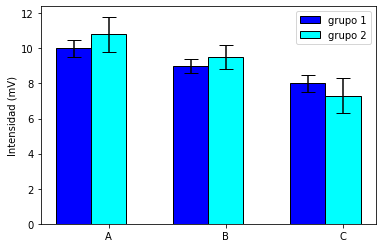

In [12]:
# Supongamos que tenemos el siguiente conjunto de datos
barWidth = 0.3
bars1 = [10, 9, 8.]
bars2 = [10.8, 9.5, 7.3]

# Para crear un gráfico de barras con barras de error para este conjunto de datos, 
# podemos definir el ancho de las barras de error como:
yer1 = [0.5, 0.4, 0.5]
yer2 = [1, 0.7, 1]

# The x position of bars
r1 = np.arange(len(bars1))
print(r1)

r2 = [x + barWidth for x in r1]
print(r2)

# barras grupo 1
# capsize: define el ancho de los topes que limitan cada barra de error
plt.bar(r1, bars1, width = barWidth, color = 'blue', edgecolor = 'black', yerr=yer1, capsize=7, label='grupo 1')

# barras grupo 2
plt.bar(r2, bars2, width = barWidth, color = 'cyan', edgecolor = 'black', yerr=yer2, capsize=7, label='grupo 2')

# general layout
plt.xticks([r + barWidth for r in range(len(bars1))], ['A', 'B', 'C'])
plt.ylabel('Intensidad (mV)')
plt.legend()
plt.show()

# Dispersión

Los gráficos de dispersión se utilizan para observar la relación entre variables y utiliza puntos para representar la relación entre ellas y cómo el cambio en una, afecta a la otra.

(300, 2)


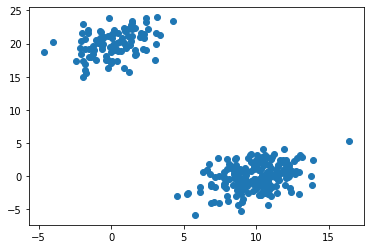

In [13]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [200,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [100,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()

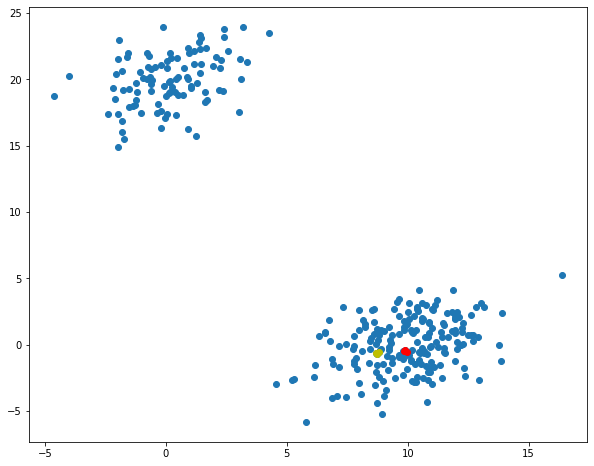

In [14]:
idx = [33,62,68]
idx2 = [15,69,41]
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1]) #pintar todos los puntos
plt.scatter(X[idx,0], X[idx,1], c='r') #destacamos en rojo los puntos interesantes
plt.scatter(X[idx2,0], X[idx2,1], c='y') #destacamos en amarillo el segundo cluster
plt.show()

# Clustering jerárquico

Como su nombre lo indica, el clustering Jerárquico construye una jerarquía de clusters para realizar el análisis y existen dos categorías para este tipo de clustering: Aglomerante y Divisivo

Para representar los resultados de la jerarquía de grupos se usa el dendograma que muestra las jerarquías de acuerdo a las distancias que existen entre los elementos del conjunto de datos, las cuales se pueden representar en una matriz de distancias.

# Clustering Jerárquico Divisivo

Este tipo de clustering se lleva a cabo con un enfoque de arriba hacia abajo (top-down), Se inicia con todos los elementos asignado a un solo cluster y sigue el algoritmo hasta que cada elemento es un cluster individual.

A diferencia del enfoque de abajo hacia arriba (aglomerante) donde las decisiones para generar los clusters se basan en lo patrones locales sin tomar en cuenta la distribución global, el enfoque de arriba hacia abajo se beneficia de la información completa sobre la distribución global al ir haciendo las particiones.

El siguiente diagrama muestra el proceso divisivo

In [15]:
from scipy.cluster.hierarchy import dendrogram,linkage

(150, 2)


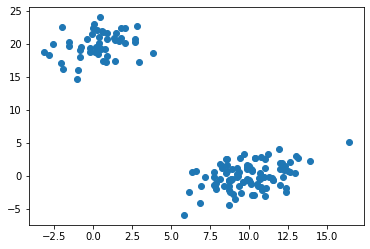

In [16]:
np.random.seed(4711)
a = np.random.multivariate_normal([10,0],[[3,1],[1,4]], size = [100,])
b = np.random.multivariate_normal([0,20], [[3,1],[1,4]], size = [50,])
X = np.concatenate((a,b))
print(X.shape)

# Dibujo de la distribución de los puntos de los datos generados al azar
plt.scatter(X[:,0], X[:,1])
plt.show()

In [17]:
Z = linkage(X, "ward")

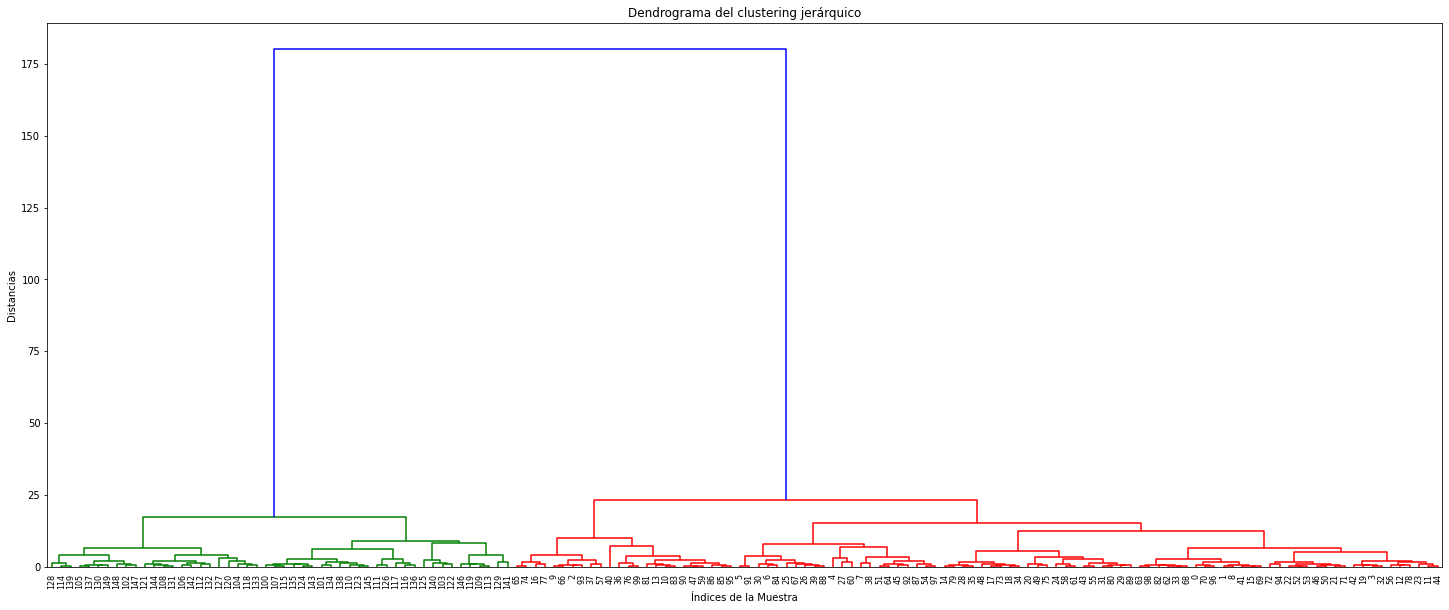

In [18]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma del clustering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(Z, leaf_rotation=90., leaf_font_size=8.0, color_threshold=0.7*180)
plt.show()

Para ambos casos, la medida de distancia que se utiliza para generar los clusters es comúnmente la distancia euclidiana. Se puede seleccionar otro método de acuerdo la relevancia del problema, pero, generalmente la distancia euclidiana es la más eficiente si no existen restricciones en el modelo.

# Gráficos de dispersión 3D

In [19]:
from scipy.spatial import distance_matrix
from mpl_toolkits.mplot3d import Axes3D

In [20]:
data = pd.read_csv("movies.csv", sep=";")
data

,user_id,star_wars,lord_of_the_rings,harry_potter
0,1,1.2,4.9,2.1
1,2,2.1,8.1,7.9
2,3,7.4,3.0,9.9
3,4,5.6,0.5,1.8
4,5,1.5,8.3,2.6
5,6,2.5,3.7,6.5
6,7,2.0,8.2,8.5
7,8,1.8,9.3,4.5
8,9,2.6,1.7,3.1
9,10,1.5,4.7,2.3


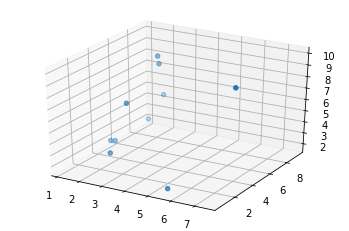

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.scatter(xs = data["star_wars"], ys = data["lord_of_the_rings"], zs=data["harry_potter"])